# Projeto de Análise de Dados
### Desenvolvido por [Ian Rodrigues dos Reis Paixão]

Este notebook foi criado por **[Ian Rodrigues dos Reis Paixão]**, com o objetivo de Analisar metricas fornecidas sobre perfurações.  
**Data de Criação:** [08/03/2024]  
**Contato:** [iang.master100@gmail.com]  


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Importação das Bibliotecas e funções

In [ ]:
# Importing all libraries and functions that this notebook is going to use

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn import datasets, tree
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder,  StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from fractions import Fraction

## Carregamento do dataset e Visualizações Iniciais

In [ ]:
 # Loading the database

pocos = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dados_pocos.csv')
pocos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10649 entries, 0 to 10648
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           10649 non-null  int64  
 1   Nome do Poço         10649 non-null  object 
 2   Fase                 10649 non-null  int64  
 3   Tipo Poço            10649 non-null  object 
 4   LDA (Lâmina D'Água)  10649 non-null  float64
 5   Diâmetro Fase        10649 non-null  object 
 6   Metragem             10649 non-null  float64
 7   NFases               10649 non-null  int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 665.7+ KB


In [ ]:
# Visualizing the first 10 rows of the database

pocos.head(10)

,Unnamed: 0,Nome do Poço,Fase,Tipo Poço,LDA (Lâmina D'Água),Diâmetro Fase,Metragem,NFases
0,0,6C5G4M,1,VERTICAL,598.0,26,607.0,4
1,1,6C5G4M,2,VERTICAL,598.0,17 1/2,1306.0,4
2,2,6C5G4M,3,VERTICAL,598.0,12 1/4,1201.0,4
3,3,6C5G4M,4,VERTICAL,598.0,8 1/2,1445.0,4
4,4,8030JC,1,VERTICAL,0.0,17 1/2,410.0,3
5,5,8030JC,2,VERTICAL,0.0,12 1/4,1670.0,3
6,6,8030JC,3,VERTICAL,0.0,8 1/2,1498.0,3
7,7,9K474J,1,VERTICAL,134.0,42,79.0,3
8,8,9K474J,2,VERTICAL,134.0,28,995.0,3
9,9,9K474J,3,VERTICAL,134.0,22,1112.0,3


In [ ]:
# Renaming columns for ease of use

pocos.rename(columns={
    "Nome do Poço": "Nome",
    "Fase": "Fase",
    "Tipo Poço": "Tipo",
    "LDA (Lâmina D'Água)": "LDA",
    "Diâmetro Fase": "Diâmetro",
    "Metragem": "Metragem",
    "NFases": "NFases",
    "Unnamed:": "Index"
    }, inplace=True)

In [ ]:
# Show database stats

print("\nDimensões: {0}".format(pocos.shape))
print("\nCampos: {0}".format(pocos.keys())) #.columns
print("\n",pocos.describe(), sep='\n')


Dimensões: (10649, 8)

Campos: Index(['Unnamed: 0', 'Nome', 'Fase', 'Tipo', 'LDA', 'Diâmetro', 'Metragem',
       'NFases'],
      dtype='object')


         Unnamed: 0          Fase           LDA      Metragem        NFases
count  10649.000000  10649.000000  10649.000000  10649.000000  10649.000000
mean    5324.000000      2.666448   1105.844333    678.043877      4.295709
std     3074.245842      1.537327    733.541670    564.198821      1.988411
min        0.000000      1.000000      0.000000      0.000000      1.000000
25%     2662.000000      1.000000    444.000000    178.000000      3.000000
50%     5324.000000      2.000000   1091.000000    604.000000      4.000000
75%     7986.000000      4.000000   1730.000000   1026.000000      5.000000
max    10648.000000      8.000000   2988.000000   4040.000000     22.000000


## Retirada de colunas que não serão utilizadas

In [ ]:
# Dropping redundant and or not usable column

pocos = pocos.drop('Nome', axis=1)
pocos = pocos.drop(pocos.columns[0], axis=1)
pocos

,Fase,Tipo,LDA,Diâmetro,Metragem,NFases
0,1,VERTICAL,598.0,26,607.0,4
1,2,VERTICAL,598.0,17 1/2,1306.0,4
2,3,VERTICAL,598.0,12 1/4,1201.0,4
3,4,VERTICAL,598.0,8 1/2,1445.0,4
4,1,VERTICAL,0.0,17 1/2,410.0,3
...,...,...,...,...,...,...
10644,1,0,0.0,30,60.0,1
10645,1,0,0.0,30,50.0,1
10646,1,0,1282.0,36,56.0,1
10647,1,0,0.0,26,49.0,1


## Visualizações das Colunas chave e Correlações

In [ ]:
# show database column types

pocos.dtypes

Fase          int64
Tipo         object
LDA         float64
Diâmetro     object
Metragem    float64
NFases        int64
dtype: object

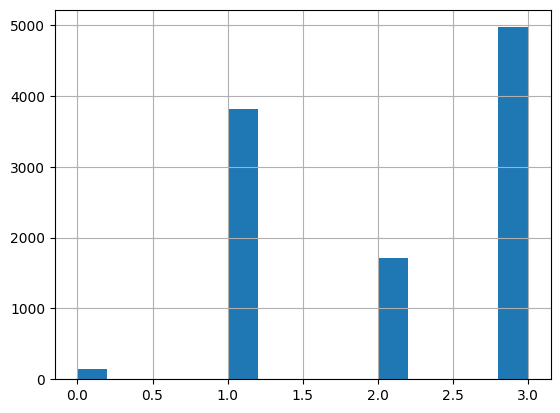

In [ ]:
# Show column Tipo

pocos['Tipo'].hist(bins=15)
plt.show()

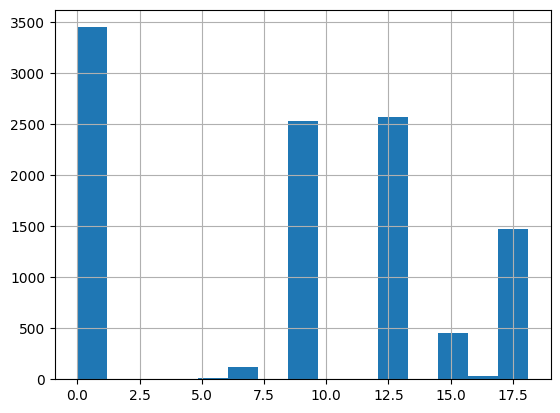

In [ ]:
# Show column Diâmetro

pocos["Diâmetro"].hist(bins=15)
plt.show()

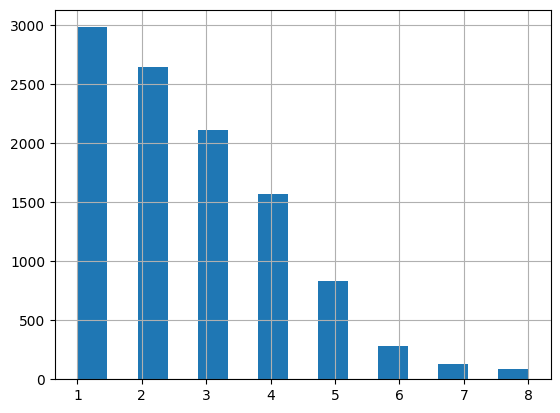

In [ ]:
# Show column Fase

pocos["Fase"].hist(bins=15)
plt.show()

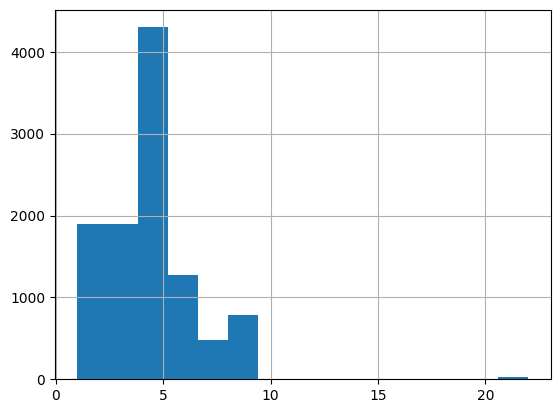

In [ ]:
# Show column NFases

pocos["NFases"].hist(bins=15)
plt.show()

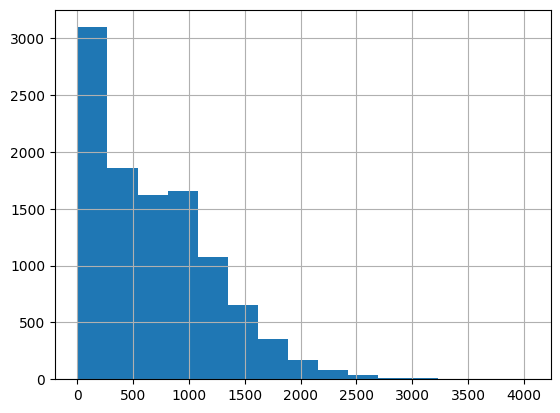

In [ ]:
# Show column Metragem

pocos["Metragem"].hist(bins=15)
plt.show()

In [ ]:
# Show correlation matrix

correlation_matrix = pocos.corr()
correlation_matrix

,Fase,Tipo,LDA,Diâmetro,Metragem,NFases
Fase,1.000000,0.106893,-0.002855,0.256722,-0.028817,0.463770
Tipo,0.106893,1.000000,0.156608,-0.007641,-0.022095,0.151850
LDA,-0.002855,0.156608,1.000000,-0.114070,-0.028984,-0.021520
Diâmetro,0.256722,-0.007641,-0.114070,1.000000,0.407747,-0.080874
Metragem,-0.028817,-0.022095,-0.028984,0.407747,1.000000,-0.183881
NFases,0.463770,0.151850,-0.021520,-0.080874,-0.183881,1.000000


## Trativas dos dados nas colunas

### Coluna Tipo

In [ ]:
# Applying LabelEncoder

le = LabelEncoder()
pocos['Tipo'] = le.fit_transform(pocos['Tipo'])
pocos['Tipo']

0        3
1        3
2        3
3        3
4        3
        ..
10644    0
10645    0
10646    0
10647    0
10648    0
Name: Tipo, Length: 10649, dtype: int64

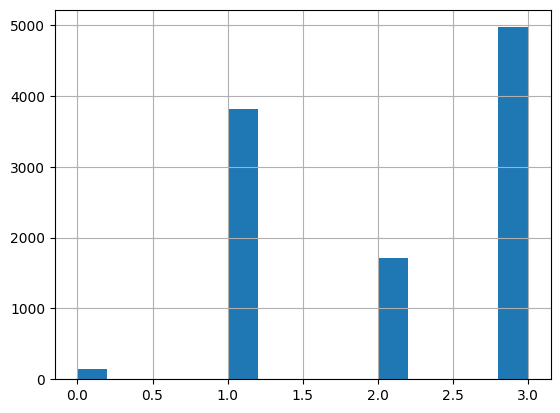

In [ ]:
pocos['Tipo'].hist(bins=15)
plt.show()

### Coluna Diâmetro

In [ ]:
# Function to extract values ​​from the Diameter Column
def convert_to_float(value):
    try:
        if ' ' in value:
            whole, fraction = value.split()
            numerator, denominator = fraction.split('/')
            return float(whole) + float(Fraction(int(numerator), int(denominator)))
        else:
            return float(value)
    except ValueError:
        return float('0')

In [ ]:
pocos['Diâmetro'] = pocos['Diâmetro'].apply(convert_to_float)

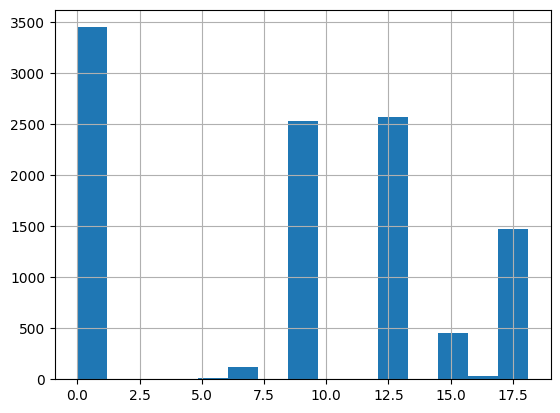

In [ ]:
pocos['Diâmetro'].hist(bins=15)
plt.show()

In [ ]:
#Verifing existance of nan

pocos.isna()

,Fase,Tipo,LDA,Diâmetro,Metragem,NFases
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
10644,False,False,False,False,False,False
10645,False,False,False,False,False,False
10646,False,False,False,False,False,False
10647,False,False,False,False,False,False


## Criando um modelo


### Separação entre treino e teste

In [ ]:
# Split the data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(pocos, pocos['Tipo'], test_size=0.25)

### Construindo o modelo

In [ ]:
#Applying Standardization

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Create a KNN classifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier()

### Avaliando o modelo

In [ ]:
#Evaluating the model

y_predicted = knn.predict(X_test)
print("\nResultado da predição: \n{0}".format(y_predicted))
print("\nPrecisão: {0}".format(accuracy_score(y_test, y_predicted)))
print("\nRelatório de classificação: \n{0}".format(classification_report(y_test, y_predicted)))
print("\nMatriz de confusão: \n{0}".format(confusion_matrix(y_test, y_predicted)))


Resultado da predição: 
[3 1 1 ... 1 1 3]

Precisão: 0.4472399549380398

Relatório de classificação: 
              precision    recall  f1-score   support

           0       1.00      0.16      0.28        37
           1       0.37      0.42      0.39       954
           2       0.00      0.00      0.00       431
           3       0.50      0.63      0.56      1241

    accuracy                           0.45      2663
   macro avg       0.47      0.30      0.31      2663
weighted avg       0.38      0.45      0.40      2663


Matriz de confusão: 
[[  6  19   0  12]
 [  0 401   0 553]
 [  0 209   0 222]
 [  0 457   0 784]]


### Extração de linhas para servirem de entrada

In [ ]:
# Extract rows based on a specific condition
condition = (pocos['LDA'] == 134)
filtered_rows = pocos[condition]

# Display the results
print("Using boolean indexing:")
print(filtered_rows)

Using boolean indexing:
   Fase  Tipo    LDA  Diâmetro  Metragem  NFases
7     1     3  134.0       0.0      79.0       3
8     2     3  134.0       0.0     995.0       3
9     3     3  134.0       0.0    1112.0       3


### Aplicando a entrada para extrair os 4 poços mais relacionados

In [ ]:
example_well = filtered_rows

# Find the 5 nearest neighbors (including the well itself)
distances, indices = knn.kneighbors(example_well)

# Extract the indices of the 4 most correlated wells (excluding the well itself)
most_correlated_indices = indices[0][1:]

# Display the information about the most correlated wells
most_correlated_wells = pocos.iloc[most_correlated_indices]
print(most_correlated_wells)

      Fase  Tipo     LDA  Diâmetro  Metragem  NFases
4722     3     1   235.0     12.25    1573.0       5
5007     4     1   142.0      8.50     712.0       4
2862     3     3  2198.0     17.50    1290.0       6
7794     2     3  1942.0      0.00    1531.5       5


## GridSearch

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(pocos, pocos['Tipo'], test_size=0.25)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create a KNN classifier
knn = KNeighborsClassifier()

# Define the parameter grid for grid search
param_grid = {
    'n_neighbors': [5],  # Test different values of k
    'weights': ['uniform', 'distance'],  # Test different weight options
    'metric': ['euclidean', 'manhattan']  # Test different distance metrics
}

# Perform grid search with 5-fold cross-validation
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

# Get the best parameters from the grid search
best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}")

# Train the final model with the best parameters
final_model = grid_search.best_estimator_
final_model.fit(X_train_scaled, y_train)

# Evaluate the final model on the test set
accuracy = final_model.score(X_test_scaled, y_test)
print(f"Final Model Accuracy: {accuracy:.2f}")

Fitting 5 folds for each of 4 candidates, totalling 20 fits
Best Parameters: {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'distance'}
Final Model Accuracy: 0.99


## Usando o melhor modelo encontrado para extrair os 4 poços mais corelatos

In [ ]:
example_well = filtered_rows

# Find the 4 nearest neighbors (including the well itself)
distances, indices = final_model.kneighbors(example_well)

# Extract the indices of the 4 most correlated wells (excluding the well itself)
most_correlated_indices = indices[0][1:]

# Display the information about the most correlated wells
most_correlated_wells = pocos.iloc[most_correlated_indices]
print(most_correlated_wells)

      Fase  Tipo     LDA  Diâmetro  Metragem  NFases
6040     4     1  1267.0     16.50     570.0       7
944      4     3   138.0      8.50      18.0       6
7074     4     1  1705.0     12.25     297.0       3
6401     3     2  1040.0     12.25     905.0       4
